In [11]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# 1. Load Dataset
df = pd.read_csv('Reviews.csv')
# Keep only necessary columns
df = df[['Text', 'Score']]

# 2. Assign Sentiment (3-Class)
def assign_sentiment(score):
    if score <= 2: return 'Negative'
    elif score == 3: return 'Neutral'
    else: return 'Positive'

df['sentiment'] = df['Score'].apply(assign_sentiment)

# 3. Sample 20,000 reviews (to keep it fast)
df = df.sample(20000, random_state=42)
print(df['sentiment'].value_counts())

sentiment
Positive    15595
Negative     2886
Neutral      1519
Name: count, dtype: int64


In [12]:
# 4. Clean and Vectorize
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X = tfidf.fit_transform(df['Text'].values.astype('U')) # Convert to Unicode string
y = df['sentiment']

# 5. Train Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Save Files
pickle.dump(model, open('amazon_model.pkl', 'wb'))
pickle.dump(tfidf, open('amazon_vectorizer.pkl', 'wb'))
print("Model and Vectorizer Saved!")

Model and Vectorizer Saved!


C:\Users\Pushpasri\AppData\Local\Temp\ipykernel_18688\3800584882.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


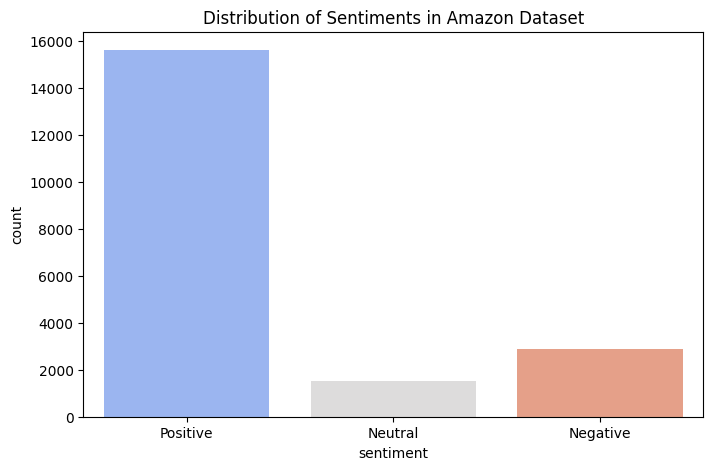

In [13]:
# Add this to your Jupyter Notebook
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Sentiments in Amazon Dataset')
plt.show()

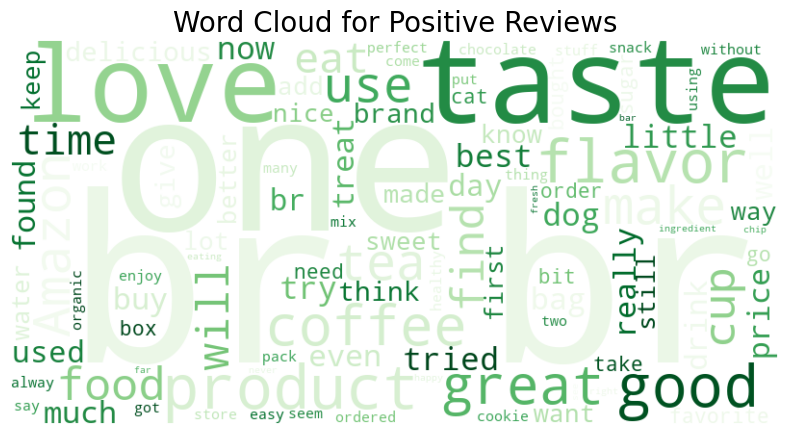

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# This function will create and display the wordcloud
data = df[df['sentiment'] == 'Positive']['Text']
def generate_wordcloud(data,title, color):
    # Combine all reviews into one giant string
    text = " ".join(review for review in data)
    
    # Generate the cloud
    wc = WordCloud(width=800, height=400, 
                   background_color='white', 
                   max_words=100, 
                   colormap=color).generate(text)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()
generate_wordcloud(data, 'Word Cloud for Positive Reviews', 'Greens')

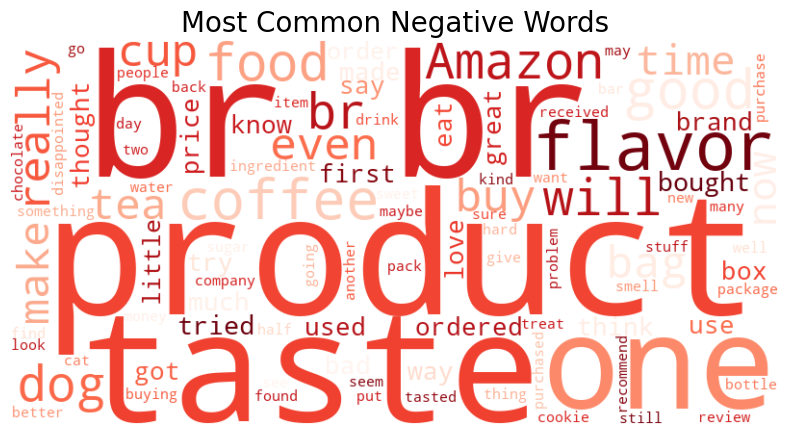

In [15]:
# Filter for Negative reviews only
neg_reviews = df[df['sentiment'] == 'Negative']['Text']
generate_wordcloud(neg_reviews, "Most Common Negative Words", "Reds")